In [1]:
import pandas as pd
import os
import glob

# Read in the csv file containing the metering data we have on EBU3B and Atkinson Hall
building_metering = pd.read_csv(r'C:\Users\vaugh\Downloads\building_metering.csv')

# Drop unneccessary columns so that we're just left with the timestamp and total energy consumption from EBU3B
building_metering = building_metering.drop(columns = ['WARREN.CAL_IT_E2531#Real Power Mean#kW', 'WARREN.CAL_IT_E2532#Real Power Mean#kW', 'WARREN.CAL_IT_Gate_E2530#Real Power Mean#kW', 'WARREN.EBU3B_E2520#Real Power Mean#kW', 'WARREN.EBU3B_E2521#Real Power Mean#kW'])

# Convert timestamp column to datetime
building_metering['Timestamp'] = pd.to_datetime(building_metering['Timestamp'])

In [2]:
# Adjusting both power totals from KW to KW/h
building_metering['EBU3B total'] = building_metering['EBU3B total'] / 4
building_metering['Atkinson total'] = building_metering['Atkinson total'] / 4

# Creating a new column to get sum of the consumption from each building
building_metering['Both Buildings total'] = building_metering['EBU3B total'] + building_metering['Atkinson total']

In [3]:
building_metering

,Timestamp,EBU3B total,Atkinson total,Both Buildings total
0,2023-01-01 00:15:00,78.153294,158.193291,236.346584
1,2023-01-01 00:30:00,78.377945,157.648875,236.026820
2,2023-01-01 00:45:00,79.260632,157.863358,237.123989
3,2023-01-01 01:00:00,79.517925,156.807864,236.325789
4,2023-01-01 01:15:00,79.008812,158.541153,237.549965
...,...,...,...,...
54521,2024-07-21 23:30:00,99.477692,167.700018,267.177710
54522,2024-07-21 23:45:00,99.075279,166.890791,265.966070
54523,2024-07-22 00:00:00,98.677269,166.719311,265.396580
54524,NaT,0.000000,0.000000,0.000000


In [4]:
# Set 'Timestamp' as the index
building_metering.set_index('Timestamp', inplace=True)

# Resample the data to monthly intervals and calculate the average for each month
monthly_avg = building_metering.resample('M').mean()

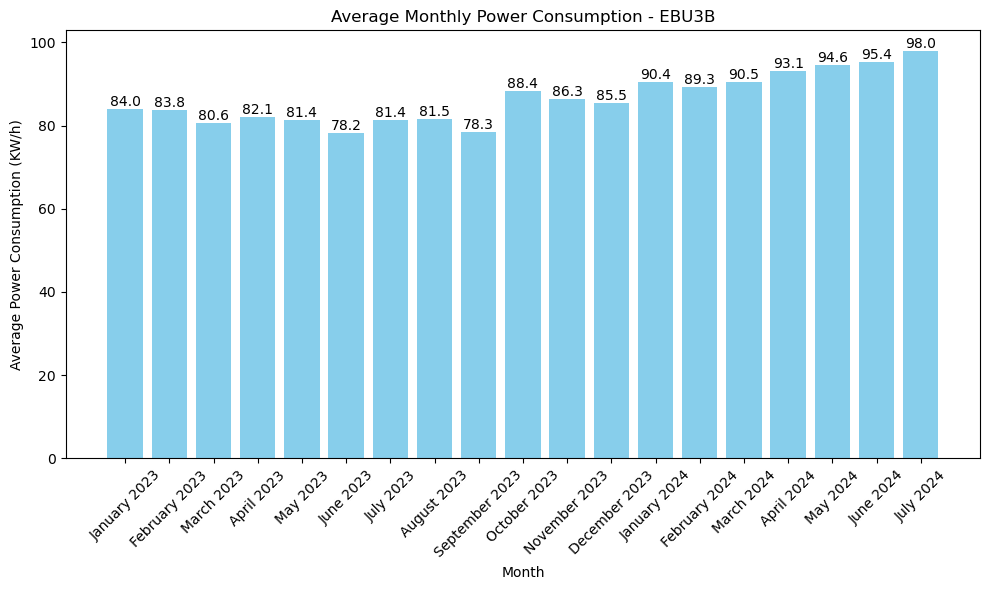

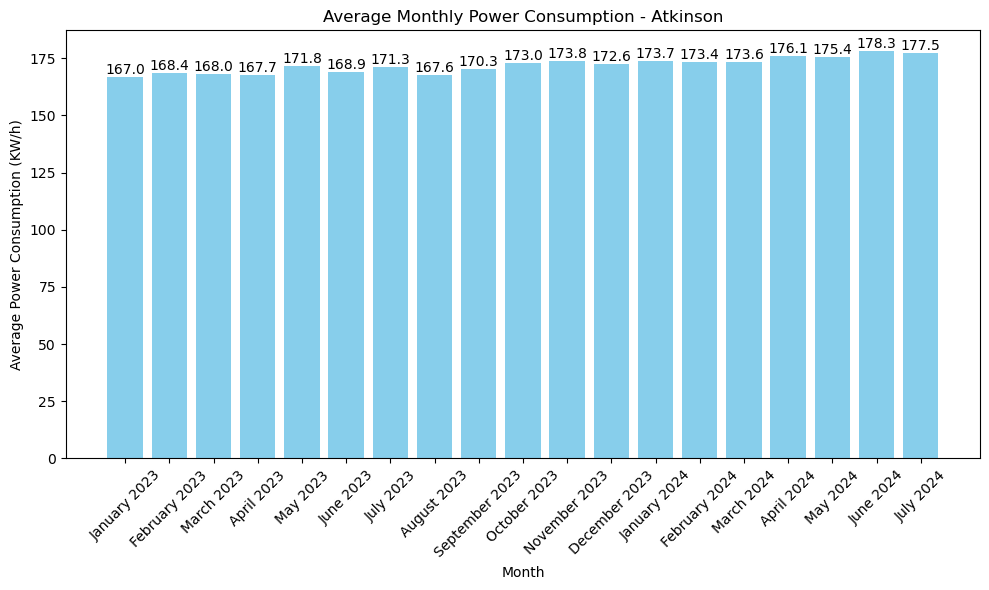

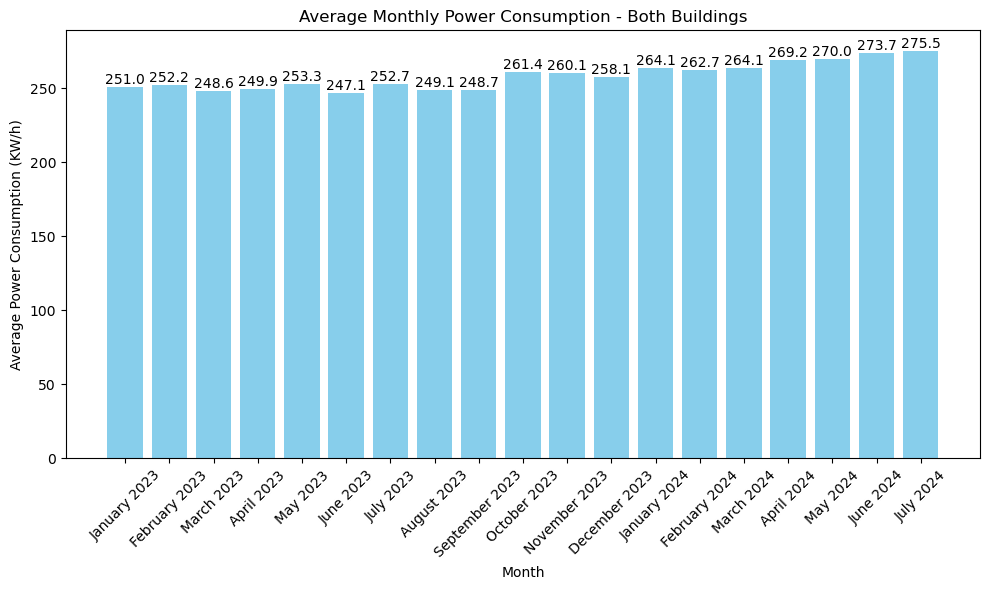

In [12]:
import matplotlib.pyplot as plt


# Plotting the bar charts
columns = ['EBU3B total', 'Atkinson total', 'Both Buildings total']
titles = ['EBU3B', 'Atkinson', 'Both Buildings']

for i, col in enumerate(columns):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(monthly_avg.index.strftime('%B %Y'), monthly_avg[col], color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Average Power Consumption (KW/h)')
    plt.title(f'Average Monthly Power Consumption - {titles[i]}')
    plt.xticks(rotation=45)
    
    # Adding the monthly consumption values on top of each bar for better visual presentation
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [6]:
monthly_avg

,EBU3B total,Atkinson total,Both Buildings total
Timestamp,,,
2023-01-31,84.016368,167.004734,251.021102
2023-02-28,83.804357,168.396810,252.201167
2023-03-31,80.595823,168.008143,248.603966
2023-04-30,82.138951,167.732359,249.871311
2023-05-31,81.425945,171.840305,253.266251
2023-06-30,78.223853,168.859947,247.083800
2023-07-31,81.410975,171.286450,252.697425
2023-08-31,81.499942,167.561306,249.061247
2023-09-30,78.347167,170.339270,248.686437


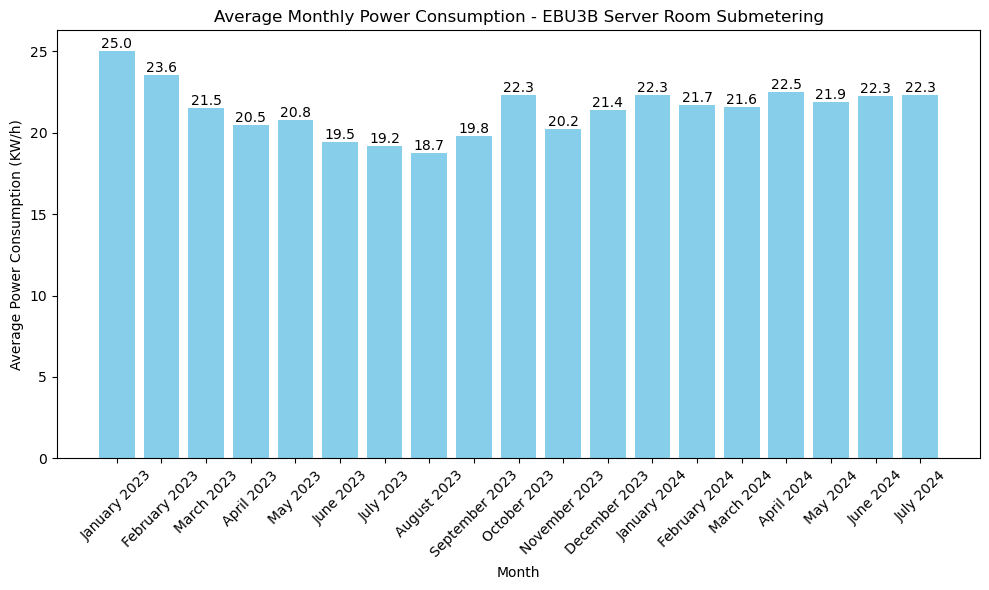

In [13]:
# Repeat the same process but this time specifically for the server room submetering

# Read in the data for the EBU3B submetering
ebu3b_servers = pd.read_csv(r'C:\Users\vaugh\Downloads\helper_spreadsheet(4).csv')

# Remove unneccessary columns so that we're left with just the timestamp, elevator submetering load, total lights submetering load, and total servers submetering load
ebu3b_servers = ebu3b_servers.drop(columns = ['Lights 1st Floor', 'Lights 2nd Floor', 'Lights 3rd Floor', 'Lights 4th Floor', 'WARREN.EBU3B_1st_Floor_E2545#Real Power Mean#kW', 'WARREN.EBU3B_1st_Floor_E2546#Real Power Mean#kW', 'WARREN.EBU3B_1st_Floor_E2548#Real Power Mean#kW', 'WARREN.EBU3B_E2544#Real Power Mean#kW', 'WARREN.EBU3B_Panel_M_E2526#Real Power Mean#kW', 'Elevator', 'Total Lights'])

# Convert timestamp column to datetime
ebu3b_servers['Timestamp'] = pd.to_datetime(ebu3b_servers['Timestamp'])

# Set 'Timestamp' as the index
ebu3b_servers.set_index('Timestamp', inplace=True)

# Adjust the power recordings to KW/h
ebu3b_servers['Total Servers'] = ebu3b_servers['Total Servers'] / 4

# Resample the data to monthly intervals and calculate the average for each month
servers_monthly_avg = ebu3b_servers.resample('M').mean()

# Plotting the bar charts
plt.figure(figsize=(10, 6))
bars = plt.bar(servers_monthly_avg.index.strftime('%B %Y'), servers_monthly_avg['Total Servers'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (KW/h)')
plt.title(f'Average Monthly Power Consumption - EBU3B Server Room Submetering')
plt.xticks(rotation=45)

# Adding the monthly consumption values on top of each bar for better visual presentation
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()